In [14]:
import os
import time
import urllib.request
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from PIL import Image

In [ ]:
def download_google_images(query, limit=10):
    chrome_options = Options()
    chrome_options.add_argument("--headless=new")
    chrome_options.add_argument("--disable-blink-features=AutomationControlled")
    chrome_options.add_argument("--window-size=1920,1080")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--log-level=3")
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
    chrome_options.add_experimental_option("useAutomationExtension", False)

    driver = webdriver.Chrome(options=chrome_options)
    driver.execute_cdp_cmd("Page.addScriptToEvaluateOnNewDocument", {
        "source": """
        Object.defineProperty(navigator, 'webdriver', {get: () => undefined});
        """
    })

    wait = WebDriverWait(driver, 10)
    driver.get("https://www.google.com/imghp")

    # Accepter les cookies si besoin
    try:
        accept = wait.until(EC.element_to_be_clickable((By.XPATH, '//button/div[normalize-space()="Tout accepter"]')))
        accept.click()
    except:
        pass

    # Recherche
    search_box = wait.until(EC.presence_of_element_located((By.NAME, "q")))
    search_box.send_keys(query)
    search_box.send_keys(Keys.RETURN)

    # Attendre un peu que les images chargent
    time.sleep(1)

    # Scroller pour charger plus de miniatures
    last_height = driver.execute_script("return document.body.scrollHeight")
    scroll_pause_time = 0.5
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(scroll_pause_time)

        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            # Essayer de cliquer sur "Afficher plus de résultats" s'il existe
            try:
                load_more = driver.find_element(By.CSS_SELECTOR, ".mye4qd")
                load_more.click()
                time.sleep(scroll_pause_time)
            except:
                break
        last_height = new_height

    thumbnails = driver.find_elements(By.CSS_SELECTOR, "img.YQ4gaf")

    if not os.path.exists("images/" + query):
        os.makedirs("images/" + query)

    count = 0
    for img in thumbnails:
        try:
            # Vérifie que ce n’est pas un logo de site
            parent_classes = img.get_attribute("class")
            if "zr758" in parent_classes:
                continue  # skip les logos

            driver.execute_script("arguments[0].scrollIntoView(true);", img)
            time.sleep(0.1)  
            img.click()

            WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "img.iPVvYb"))
            )

            actual_images = driver.find_elements(By.CSS_SELECTOR, "img.iPVvYb")
            for actual_img in actual_images:
                src = actual_img.get_attribute("src")
                if src and src.startswith("http"):
                    filename = os.path.join("images", query, f"{query}_{count}.jpg")
                    urllib.request.urlretrieve(src, filename)
                    print(f"[✓] {filename}")
                    count += 1
                    break
        except Exception as e:
            print("Erreur :", e)

        if count >= limit:
            break

    driver.quit()
    print("Téléchargement terminé.")

Erreur : Message: element click intercepted: Element  is not clickable at point (92, 90). Other element would receive the click: <div jsname="bVqjv" class="GKS7s">...</div>
  (Session info: chrome=138.0.7204.101)
Stacktrace:
	GetHandleVerifier [0x0x7ff617e56f75+76917]
	GetHandleVerifier [0x0x7ff617e56fd0+77008]
	(No symbol) [0x0x7ff617c09dea]
	(No symbol) [0x0x7ff617c68269]
	(No symbol) [0x0x7ff617c65c02]
	(No symbol) [0x0x7ff617c62c41]
	(No symbol) [0x0x7ff617c61b31]
	(No symbol) [0x0x7ff617c53368]
	(No symbol) [0x0x7ff617c8846a]
	(No symbol) [0x0x7ff617c52c16]
	(No symbol) [0x0x7ff617c88680]
	(No symbol) [0x0x7ff617cb065c]
	(No symbol) [0x0x7ff617c88243]
	(No symbol) [0x0x7ff617c51431]
	(No symbol) [0x0x7ff617c521c3]
	GetHandleVerifier [0x0x7ff61812d2ad+3051437]
	GetHandleVerifier [0x0x7ff618127903+3028483]
	GetHandleVerifier [0x0x7ff61814589d+3151261]
	GetHandleVerifier [0x0x7ff617e7183e+185662]
	GetHandleVerifier [0x0x7ff617e796ff+218111]
	GetHandleVerifier [0x0x7ff617e5faf4+112628
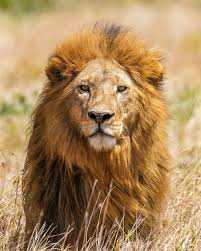
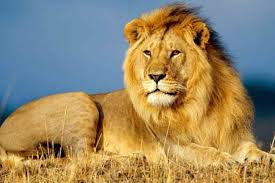
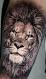
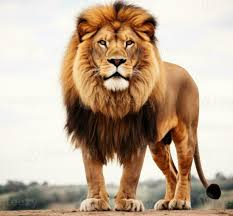
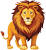
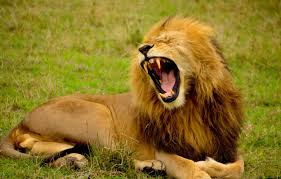
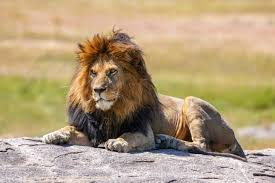
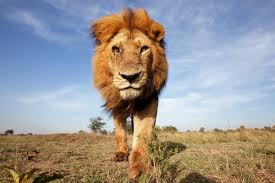
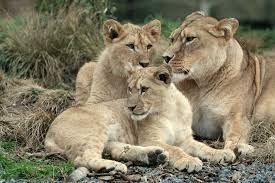
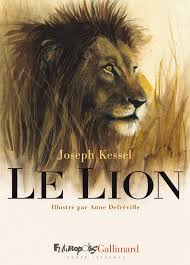
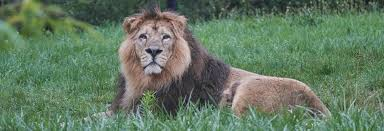

In [9]:
download_google_images("lion", limit=1200)

Erreur : Message: element click intercepted: Element  is not clickable at point (92, 90). Other element would receive the click: <div jsname="bVqjv" class="GKS7s">...</div>
  (Session info: chrome=138.0.7204.101)
Stacktrace:
	GetHandleVerifier [0x0x7ff617e56f75+76917]
	GetHandleVerifier [0x0x7ff617e56fd0+77008]
	(No symbol) [0x0x7ff617c09dea]
	(No symbol) [0x0x7ff617c68269]
	(No symbol) [0x0x7ff617c65c02]
	(No symbol) [0x0x7ff617c62c41]
	(No symbol) [0x0x7ff617c61b31]
	(No symbol) [0x0x7ff617c53368]
	(No symbol) [0x0x7ff617c8846a]
	(No symbol) [0x0x7ff617c52c16]
	(No symbol) [0x0x7ff617c88680]
	(No symbol) [0x0x7ff617cb065c]
	(No symbol) [0x0x7ff617c88243]
	(No symbol) [0x0x7ff617c51431]
	(No symbol) [0x0x7ff617c521c3]
	GetHandleVerifier [0x0x7ff61812d2ad+3051437]
	GetHandleVerifier [0x0x7ff618127903+3028483]
	GetHandleVerifier [0x0x7ff61814589d+3151261]
	GetHandleVerifier [0x0x7ff617e7183e+185662]
	GetHandleVerifier [0x0x7ff617e796ff+218111]
	GetHandleVerifier [0x0x7ff617e5faf4+112628
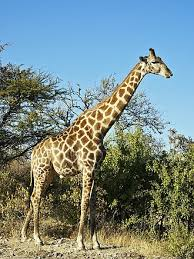
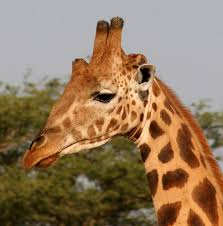
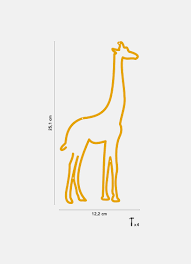
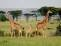
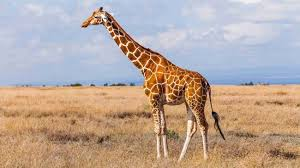
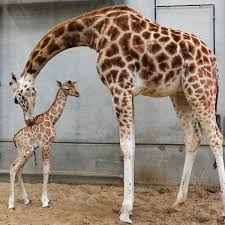
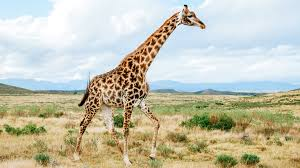
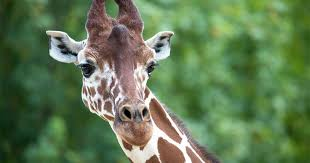
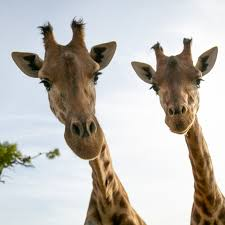

In [10]:
download_google_images("girafe", limit=1200)

Erreur : Message: element click intercepted: Element  is not clickable at point (92, 90). Other element would receive the click: <div jsname="bVqjv" class="GKS7s">...</div>
  (Session info: chrome=138.0.7204.101)
Stacktrace:
	GetHandleVerifier [0x0x7ff617e56f75+76917]
	GetHandleVerifier [0x0x7ff617e56fd0+77008]
	(No symbol) [0x0x7ff617c09dea]
	(No symbol) [0x0x7ff617c68269]
	(No symbol) [0x0x7ff617c65c02]
	(No symbol) [0x0x7ff617c62c41]
	(No symbol) [0x0x7ff617c61b31]
	(No symbol) [0x0x7ff617c53368]
	(No symbol) [0x0x7ff617c8846a]
	(No symbol) [0x0x7ff617c52c16]
	(No symbol) [0x0x7ff617c88680]
	(No symbol) [0x0x7ff617cb065c]
	(No symbol) [0x0x7ff617c88243]
	(No symbol) [0x0x7ff617c51431]
	(No symbol) [0x0x7ff617c521c3]
	GetHandleVerifier [0x0x7ff61812d2ad+3051437]
	GetHandleVerifier [0x0x7ff618127903+3028483]
	GetHandleVerifier [0x0x7ff61814589d+3151261]
	GetHandleVerifier [0x0x7ff617e7183e+185662]
	GetHandleVerifier [0x0x7ff617e796ff+218111]
	GetHandleVerifier [0x0x7ff617e5faf4+112628
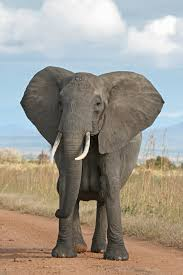
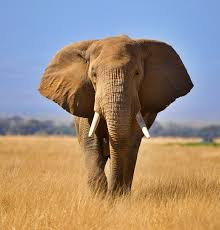
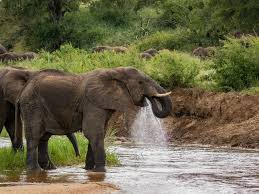
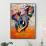
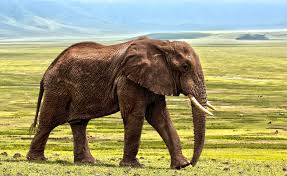
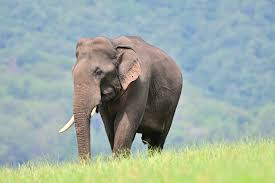
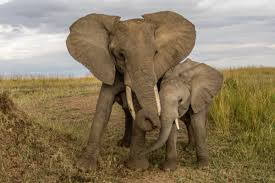
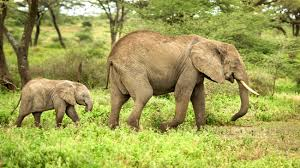
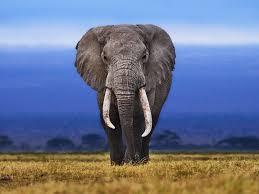

In [11]:
download_google_images("elephant", limit=1200)

In [15]:
def rotate_and_save_images(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)

            # Sauvegarde l'image originale
            base_name, ext = os.path.splitext(filename)
            img.save(os.path.join(output_folder, f"{base_name}_rot0{ext}"))

            # Rotations 90, 180, 270 degrés
            for angle in [90, 180, 270]:
                rotated_img = img.rotate(angle, expand=True)
                rotated_img.save(os.path.join(output_folder, f"{base_name}_rot{angle}{ext}"))

    print(f"Traitement terminé, images enregistrées dans : {output_folder}")

In [21]:
rotate_and_save_images('./images32/elephant', './images32/elephant')

Traitement terminé, images enregistrées dans : ./images32/elephant
